In [1]:
library(readxl)
library(dplyr)   #  %>% 함수(파이프연산자)
library(ggplot2)

customer_r <- read_excel("customer_r.xlsx")
reservation_r <- read_excel("reservation_r.xlsx")
order_info_r <- read_excel("order_info_r.xlsx")
item_r <- read_excel("item_r.xlsx")
colnames(customer_r) <- tolower(colnames(customer_r))
colnames(reservation_r) <- tolower(colnames(reservation_r))
colnames(order_info_r) <- tolower(colnames(order_info_r))
colnames(item_r) <- tolower(colnames(item_r))

Warning message:
"package 'readxl' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [2]:
my_first_cook <- order_info_r %>%  # 읽어오기
                 mutate(reserv_month = substr(reserv_no,1,6)) %>% # 계산 후 열을 생성
                 group_by(item_id, reserv_month) %>%  # 그룹 생성
                 summarise(avg_sales = mean(sales)) %>% # 요약 평균 계산
                 arrange(item_id,reserv_month) # 정렬 

`summarise()` has grouped output by 'item_id'. You can override using the `.groups` argument.


In [3]:
head(my_first_cook)

item_id,reserv_month,avg_sales
M0001,201906,48000.00
M0001,201907,68000.00
M0001,201908,56000.00
M0001,201909,66000.00
M0001,201910,92000.00
M0001,201911,68307.69


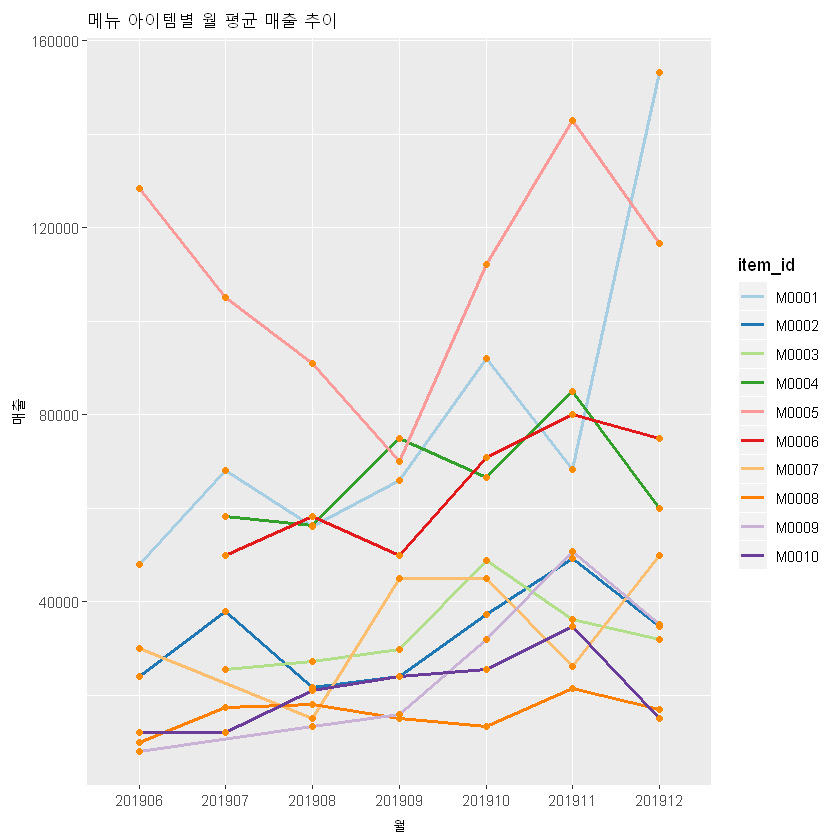

In [5]:
ggplot(my_first_cook, aes(reserv_month, avg_sales, group = item_id, color = item_id)) +
    geom_line(size = 1) +
    geom_point(color = "darkorange", size = 1.5) + 
    scale_color_brewer(palette = "Paired") +
    labs(title = "메뉴 아이템별 월 평균 매출 추이", x = "월", y = "매출")

In [8]:
weight <- c(74,66,61,59,70) # 다섯명의 몸무게값
mean(weight) # 다섯명의 평균 몸무게는 66

[1] 66

In [10]:
median(weight) # 다섯개의 값중에 중앙에 위치한 값 59 61 66 70 74

[1] 66

In [11]:
var(weight) # 분산값 제곱편차의 평균값을 데이터개수 -1 로 나눈값 

[1] 38.5

In [12]:
sd(weight) # 표준편차  분산값에 루트를 적용한 값 평균값을 기준으로 약 6.2 정도의 차이가 난다

[1] 6.204837

In [13]:
table(reservation_r$branch)


  강남   강동   강북   강서   관악   광진   구로   금천   노원   도봉 동대문 
    49     18     12     22     15      8     14     10     10      6     20 
  동작   마포 서대문   서초   성동   성북   송파   양천 영등포   용산   은평 
    21     22     20     22     13      4     17     10     17     19     10 
  종로   중구   중랑 
    13     18      6 

In [14]:
head(reservation_r)

reserv_no,reserv_date,reserv_time,customer_id,branch,visitor_cnt,cancel
2019082701,20190827,1800,W1340914,마포,2,N
2019082602,20190826,1200,W341658,동작,5,N
2019082601,20190826,1800,W1328993,강북,4,N
2019082501,20190825,1800,W1340463,용산,2,N
2019082401,20190824,1200,W1344912,강동,3,N
2019082301,20190823,1800,W1344753,영등포,2,N


In [16]:
no_cancel_data <- reservation_r %>% filter(cancel == "N")

In [17]:
table(no_cancel_data$branch)


  강남   강동   강북   강서   관악   광진   구로   금천   노원   도봉 동대문 
    41     17     12     19     15      8     11      7      8      5     14 
  동작   마포 서대문   서초   성동   성북   송파   양천 영등포   용산   은평 
    18     20     18     17     12      4     15      8     16     18      8 
  종로   중구   중랑 
     7     15      4 

In [19]:
df_f_join_1 <- inner_join(reservation_r, order_info_r, by = "reserv_no")

In [20]:
df_f_join_2 <- inner_join(df_f_join_1,item_r,by = "item_id")

In [21]:
head(df_f_join_2)

reserv_no,reserv_date,reserv_time,customer_id,branch,visitor_cnt,cancel,order_no,item_id,quantity,sales,product_name,product_desc,category_id,price
2019082701,20190827,1800,W1340914,마포,2,N,190827547272110010,M0001,2,48000,SPECIAL_SET,온라인_전용상품,COMBO,24000
2019082602,20190826,1200,W341658,동작,5,N,190826137302710010,M0010,5,30000,JUICE,주스,BEVERAGE,6000
2019082601,20190826,1800,W1328993,강북,4,N,190826137192910010,M0005,4,140000,STEAK,스테이크,FOOD,35000
2019082501,20190825,1800,W1340463,용산,2,N,190825107839310010,M0008,2,20000,SANDWICH,샌드위치,FOOD,10000
2019082401,20190824,1200,W1344912,강동,3,N,190824137844710010,M0006,3,75000,SALAD_BAR,샐러드바,COMBO,25000
2019082301,20190823,1800,W1344753,영등포,2,N,190823107844510010,M0004,1,25000,SEA_FOOD,씨푸드,FOOD,25000


In [22]:
df_branch_sales <- df_f_join_2 %>%
    filter(branch == "강남" | branch == "마포" | branch == "서초") %>%
    group_by(branch, product_name) %>%         
    summarise(sales_amt = sum(sales) / 1000) 

`summarise()` has grouped output by 'branch'. You can override using the `.groups` argument.


In [23]:
df_branch_sales

branch,product_name,sales_amt
강남,JUICE,66
강남,PASTA,180
강남,PIZZA,204
강남,SALAD,105
강남,SALAD_BAR,200
강남,SANDWICH,20
강남,SEA_FOOD,250
강남,SPECIAL_SET,1416
강남,STEAK,1505
강남,WINE,128
